In [ ]:

import numpy as np
import pandas as pd
import os

from PIL import Image

import matplotlib.pyplot as plt

import keras.layers as layers
import keras.optimizers as optimizers
from keras.models import Model, load_model
from keras import layers
from keras import models
from keras.models import load_model

import ipywidgets

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=670b2a7c70f18" -O "data.zip"
!unzip  -O cp949 "data.zip" -d "data"

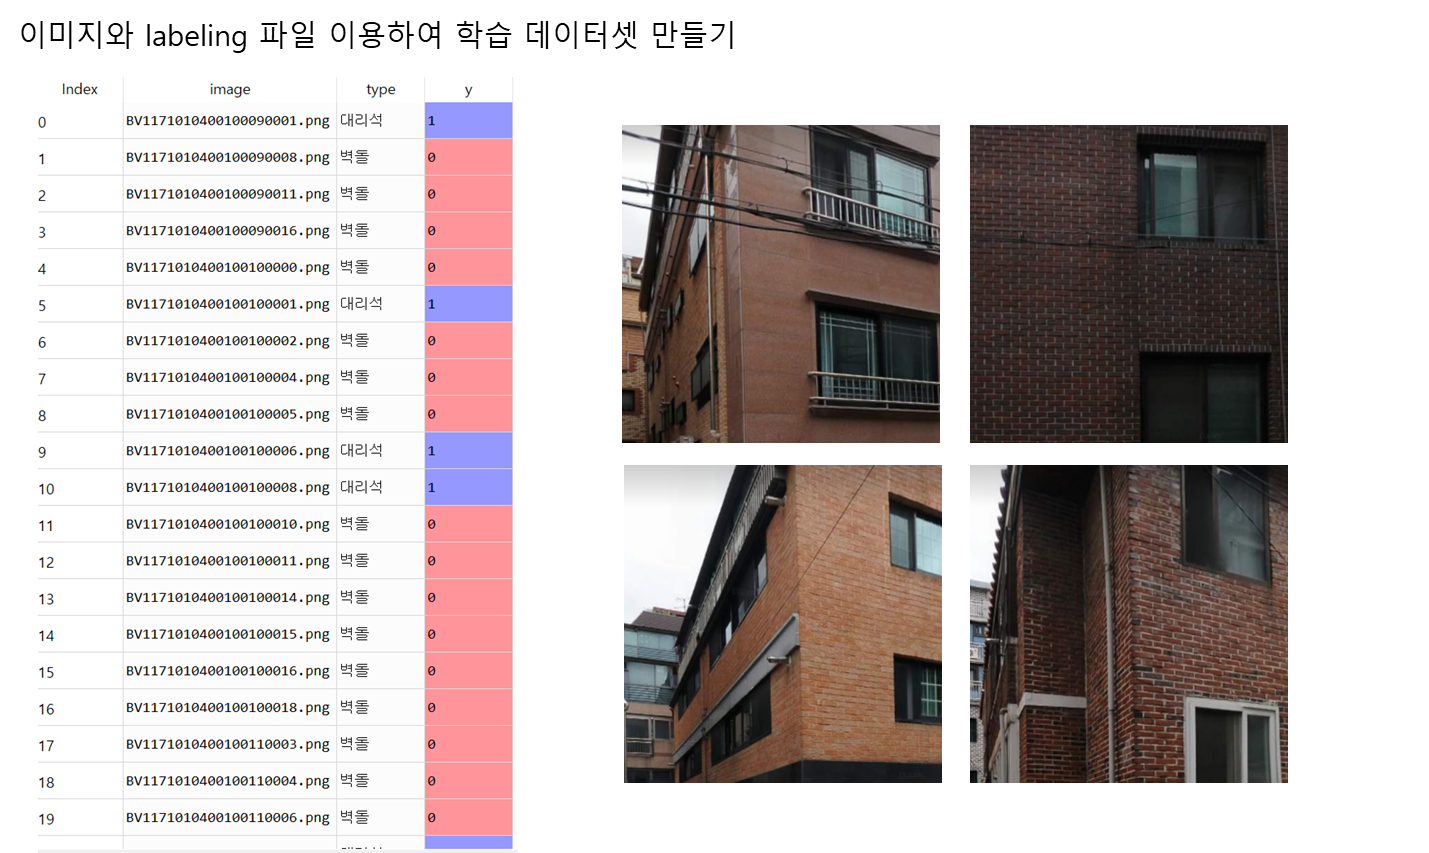

In [ ]:
#벽돌과 대리석 이미지 라벨링 불러오기
data = pd.read_csv('data/data.csv', sep=',', encoding='cp949')
#y값을 지정
data['y'] = data['type'].apply(lambda x: 1 if x =='대리석' else 0)
data.head(10)

In [ ]:
#벽돌과 대리석 이미지  불러오기
flist = 'data/images/' + data['image']

image_list = []
for f in flist:
    img = Image.open(f)
    image_list.append(np.array(img))


In [ ]:

def show_data(index):
  if 0 <= index < len(data):
    print(f"Image Filename: {data['image'][index]}")
    print(f"Type: {data['type'][index]}")
    print(f"y: {data['y'][index]}")

    plt.imshow(image_list[index])
    plt.show()
  else:
    print("Invalid index")

# Create a dropdown widget for selecting the data index
dropdown = ipywidgets.Dropdown(
    options=list(range(len(data))),
    description='Select Index:',
    disabled=False,
)

# Create an output widget to display the selected data
output = ipywidgets.Output()

# Define a function to handle dropdown changes
def on_dropdown_change(change):
  with output:
    output.clear_output()
    show_data(change.new)


# Link the dropdown widget to the function
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown and output widgets
display(dropdown, output)


In [ ]:
#학습데이터 100개
training_x = np.array(image_list[:100])
training_y = np.array(data['y'].values[:100])

#검증 데이터 나머지
testing_x = np.array(image_list[100:])
testing_y = np.array(data['y'].values[100:])

print('training x : ' + str(training_x.shape) + ', y : ' + str(training_y.shape))
print('testing x : ' + str(testing_x.shape) + ', y : ' + str(testing_y.shape))

In [ ]:
#출력해보기

print(training_y[0])
plt.imshow(training_x[0])
plt.show()

In [ ]:
#컬러 값을 0~1로 노멀라이징
training_x = training_x / 255
testing_x = testing_x / 255

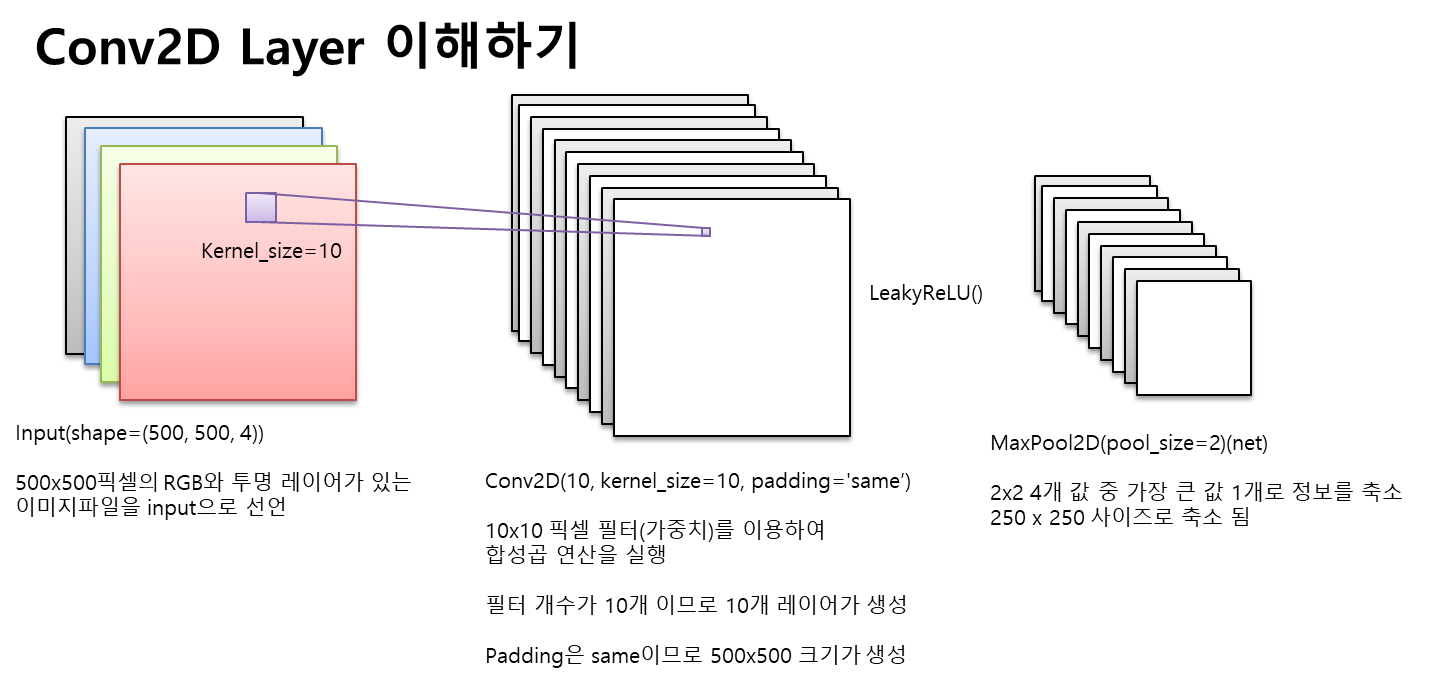

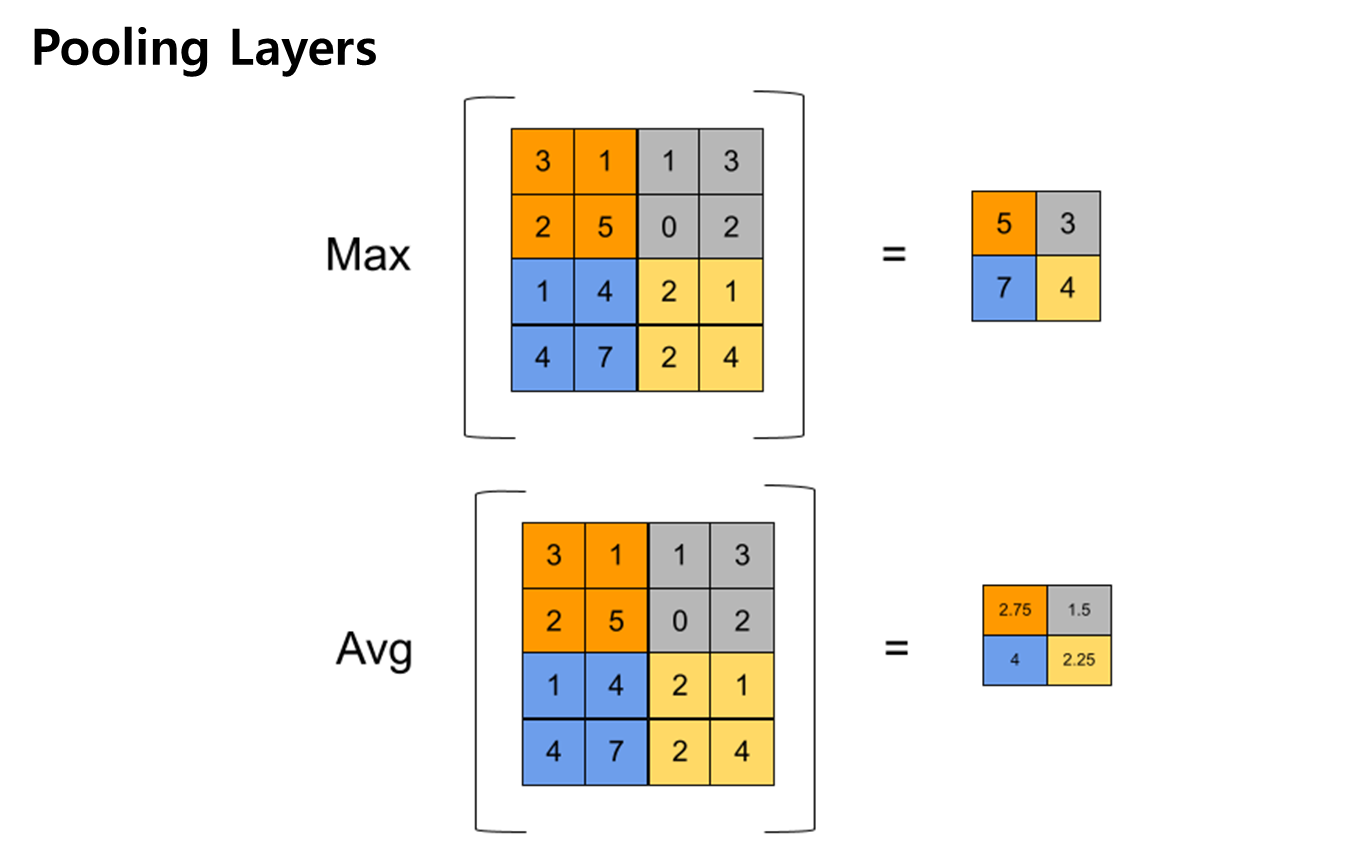

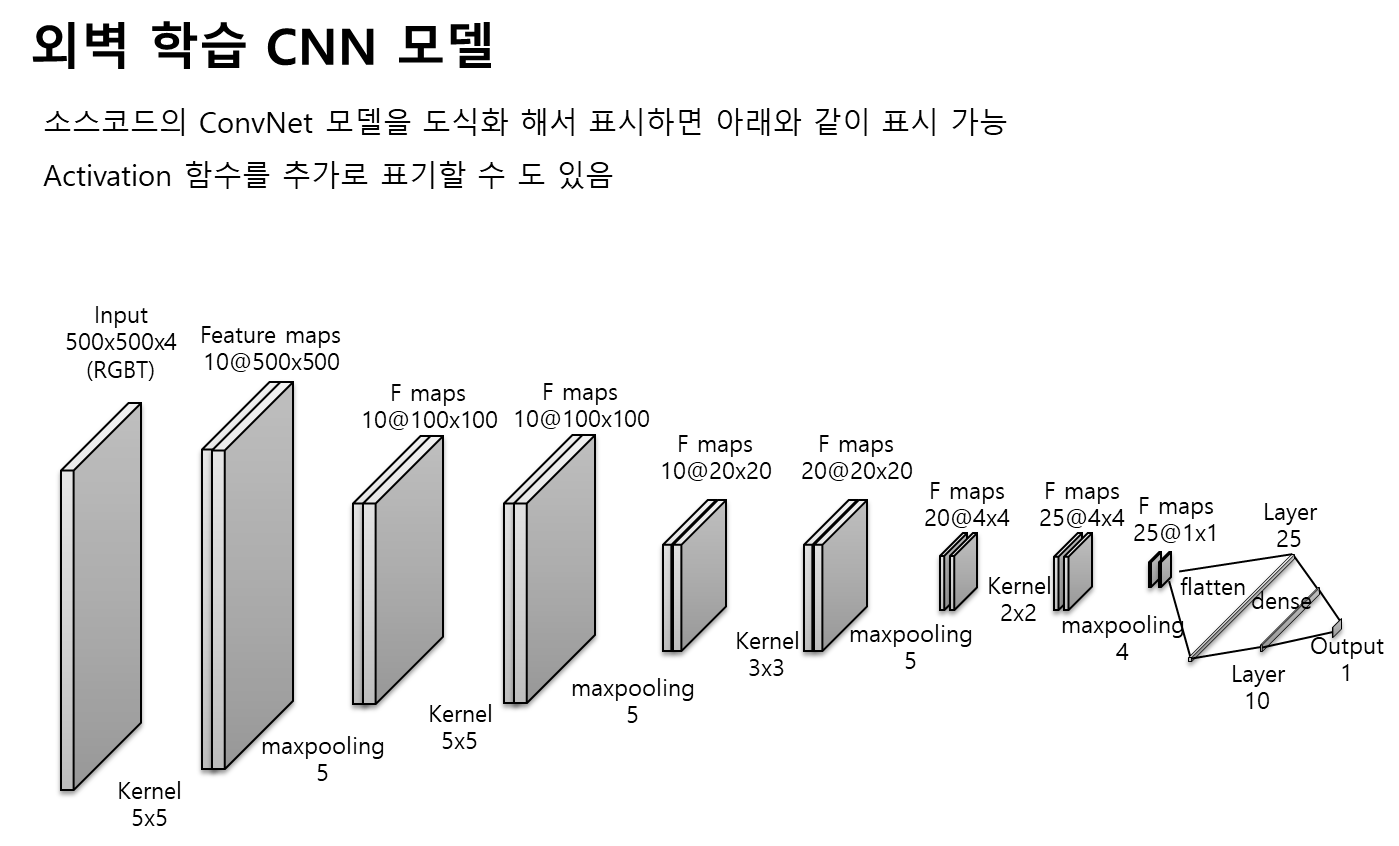

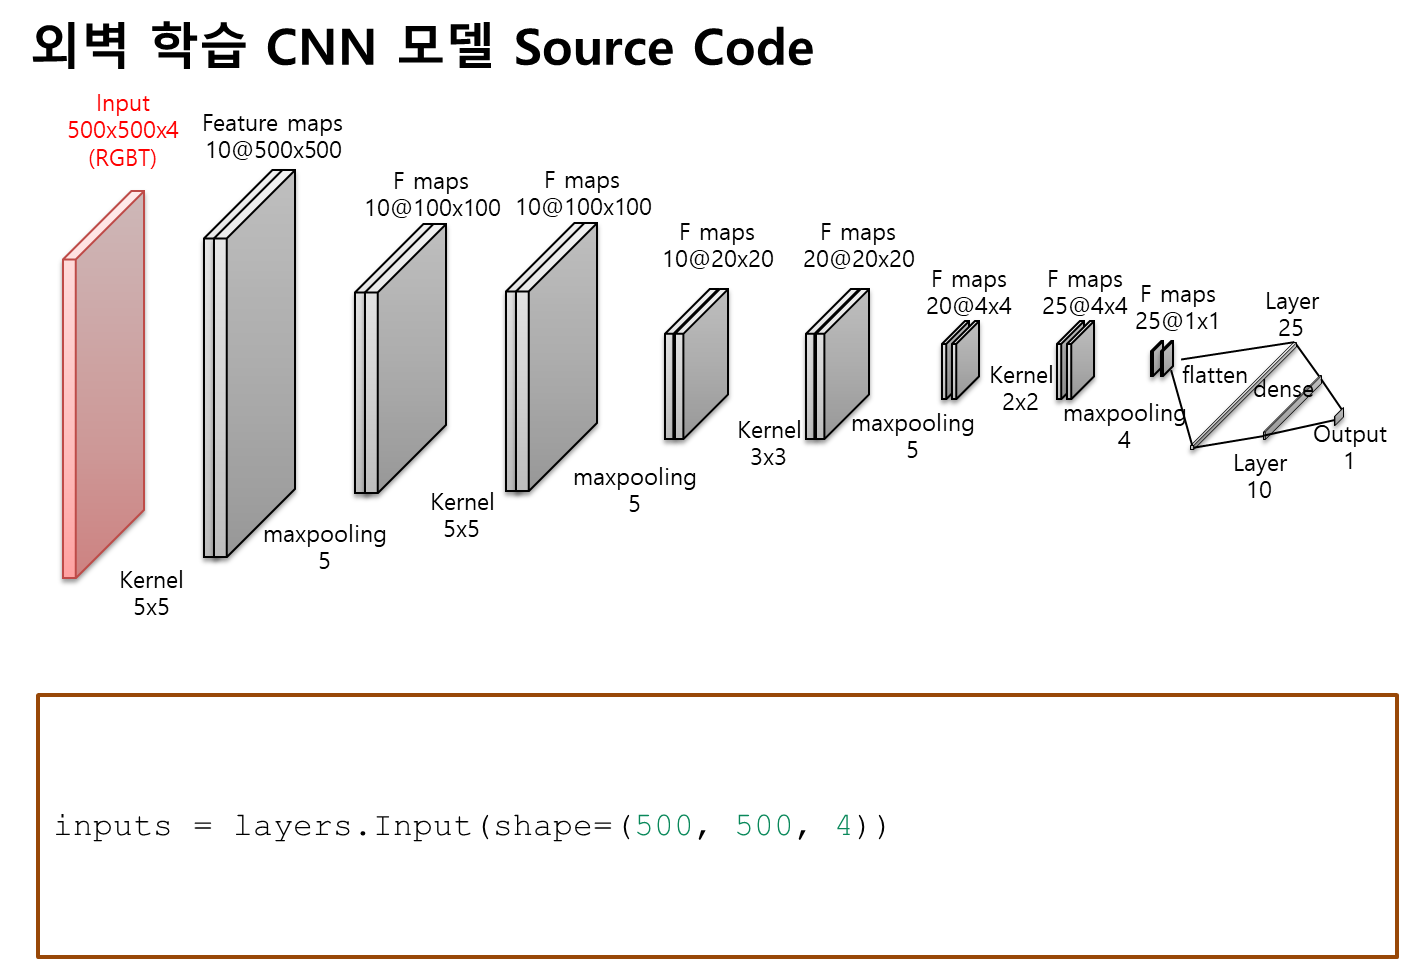

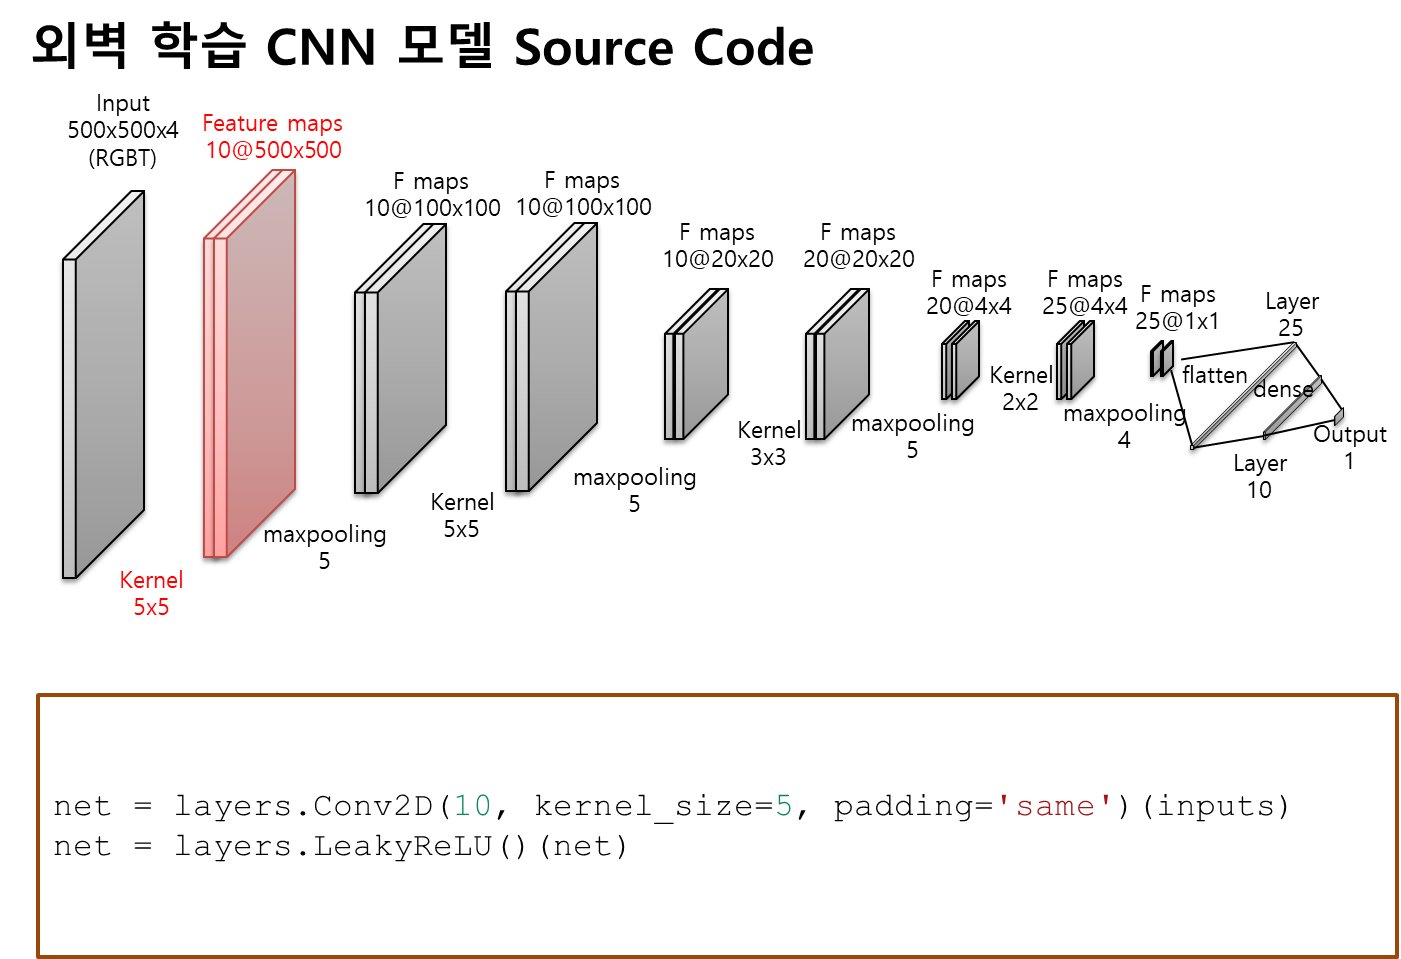

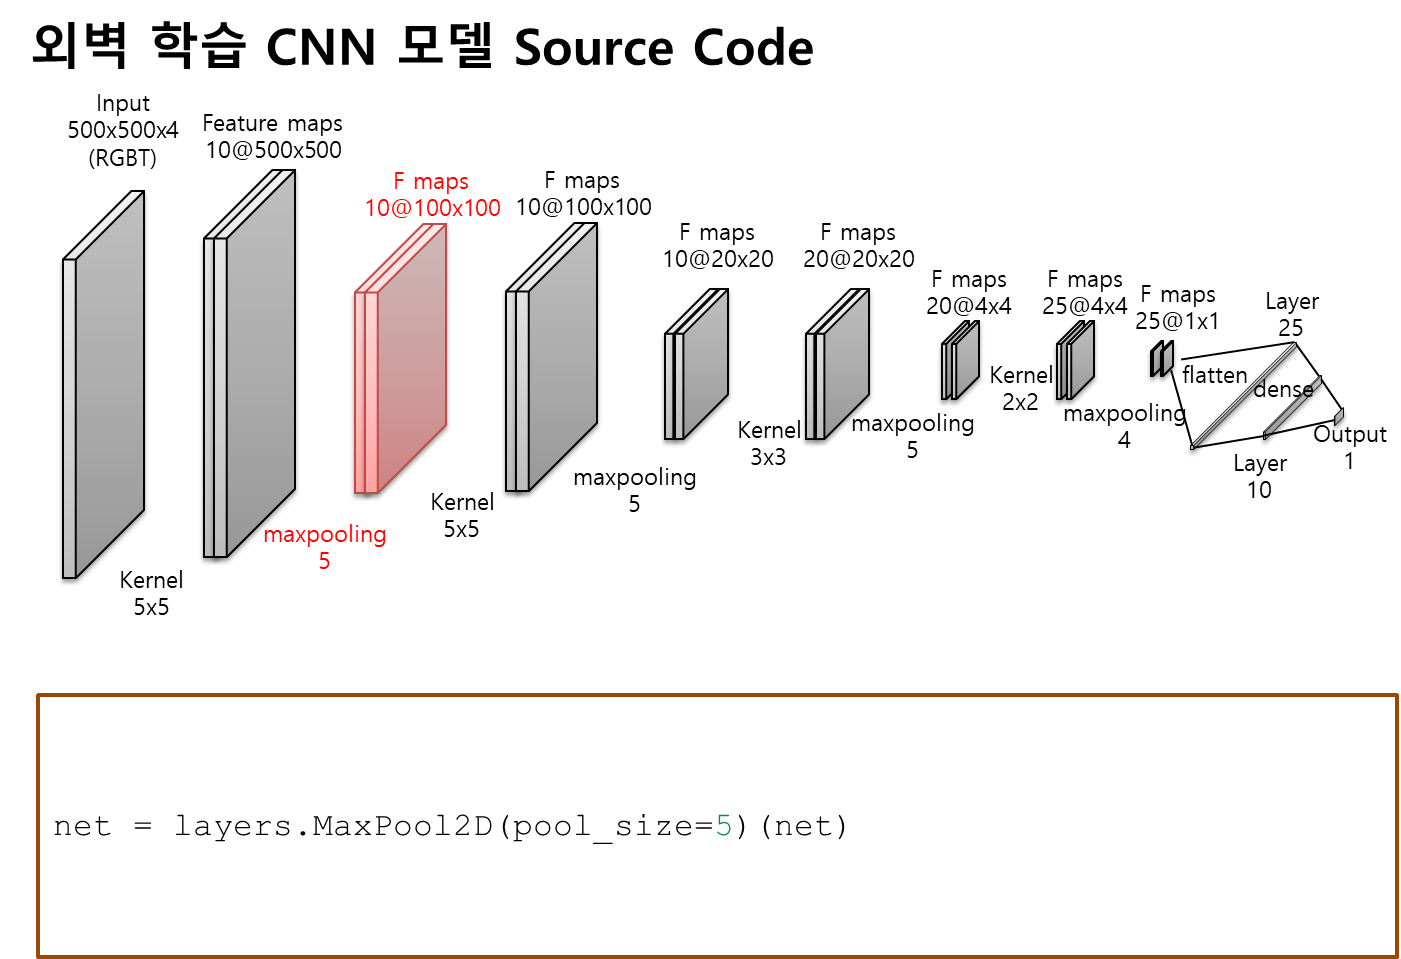

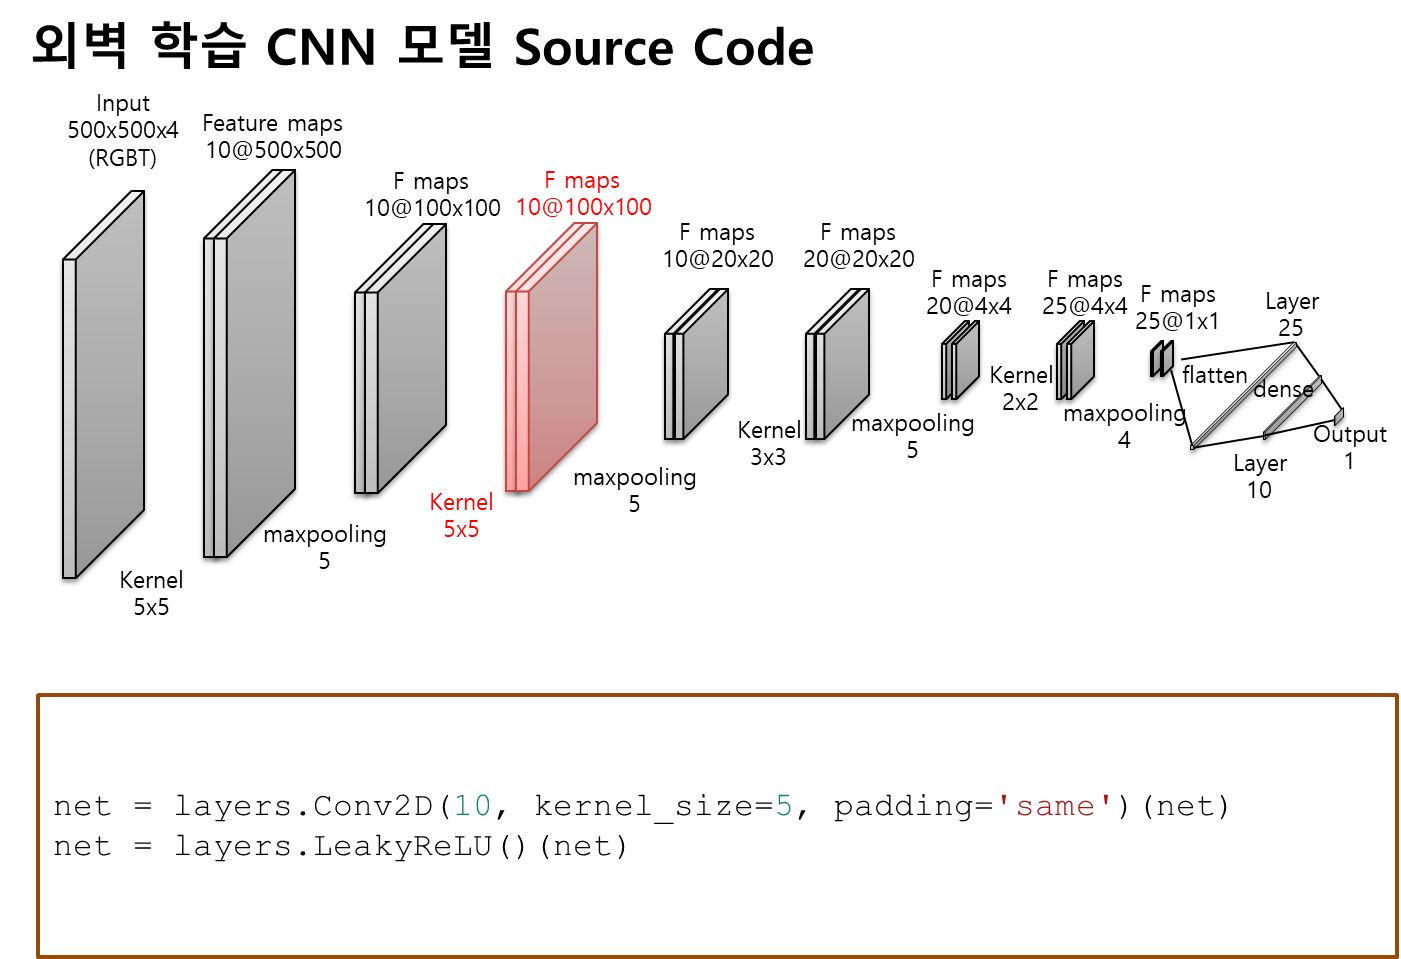

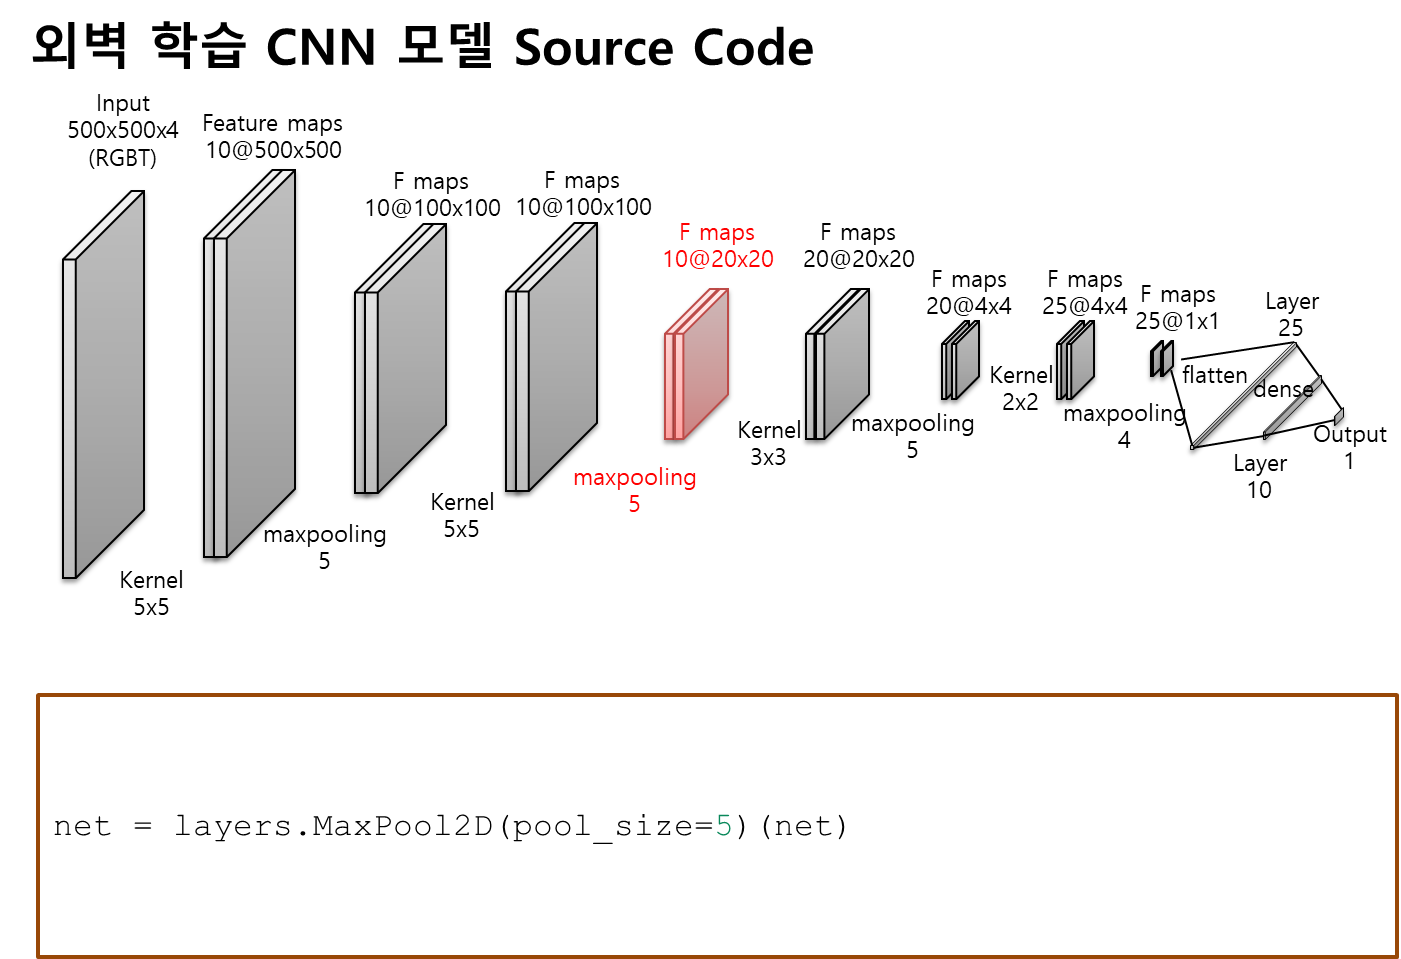

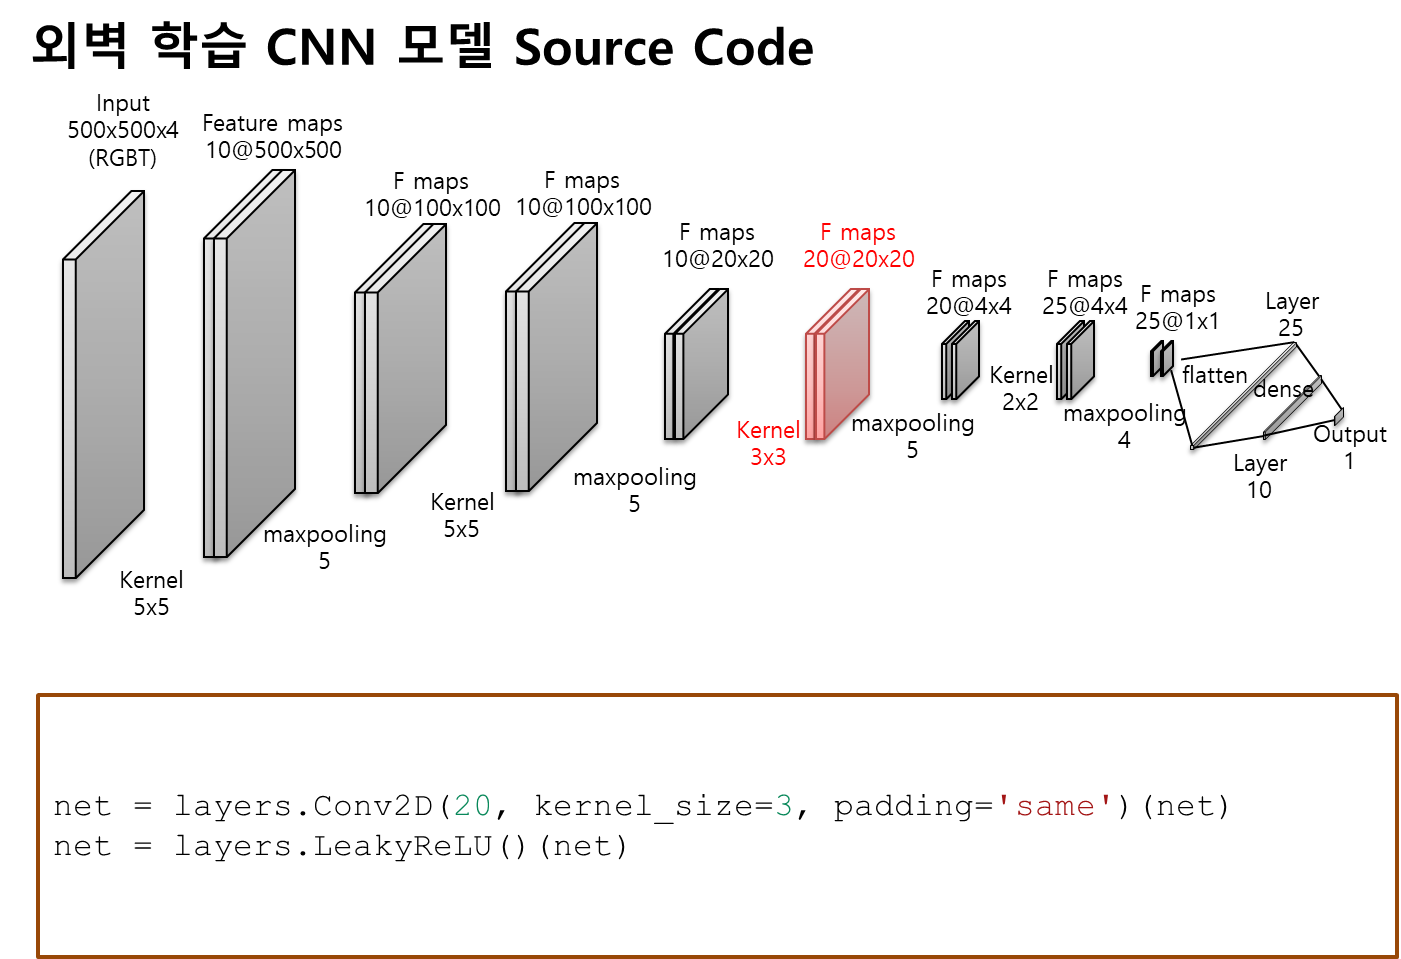

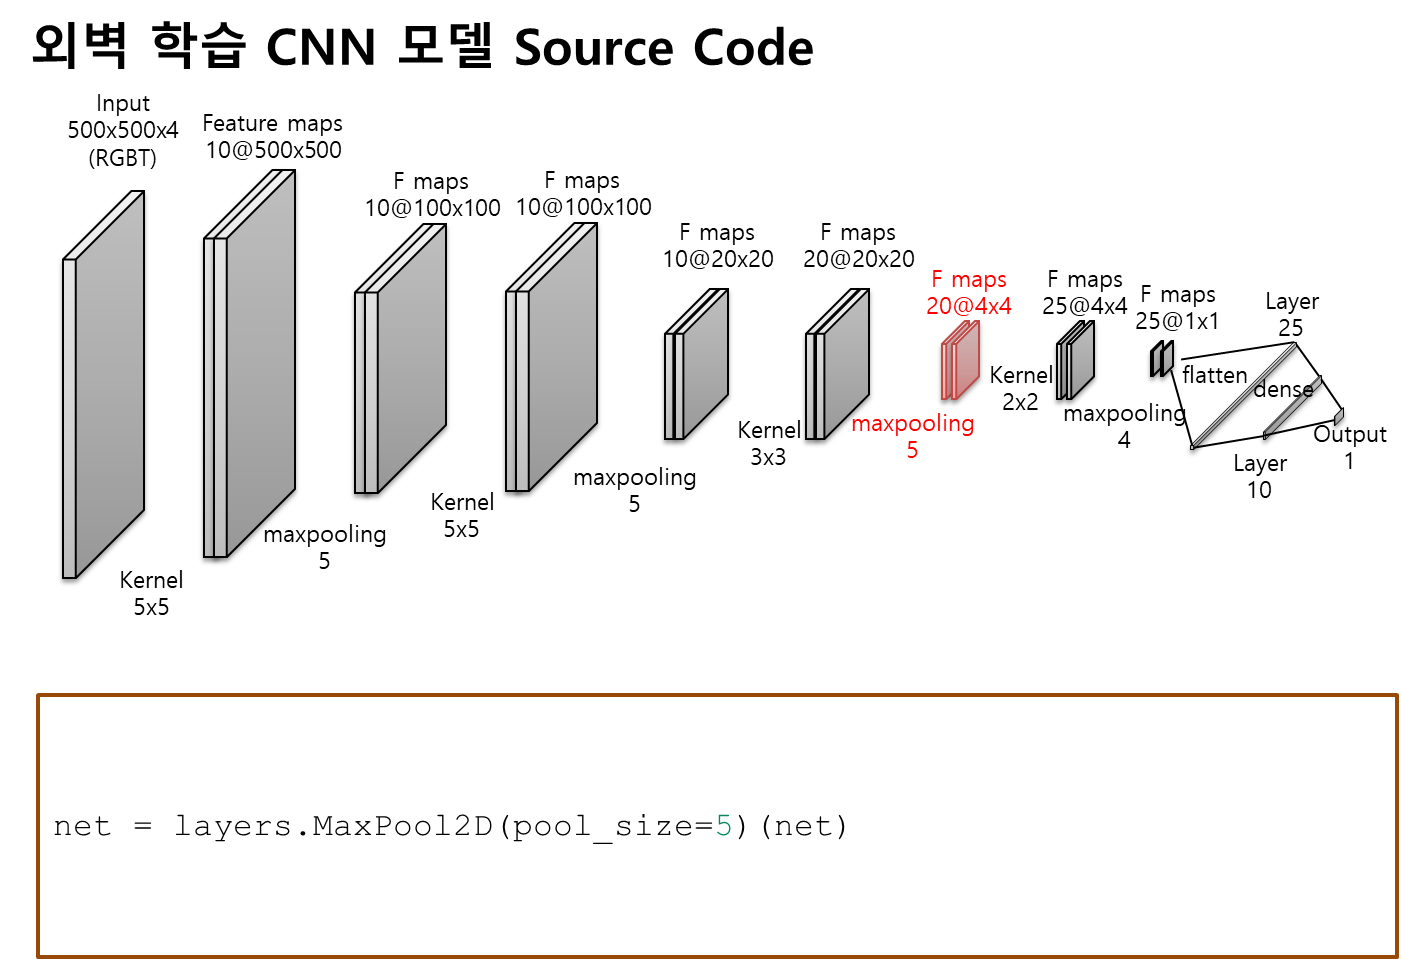

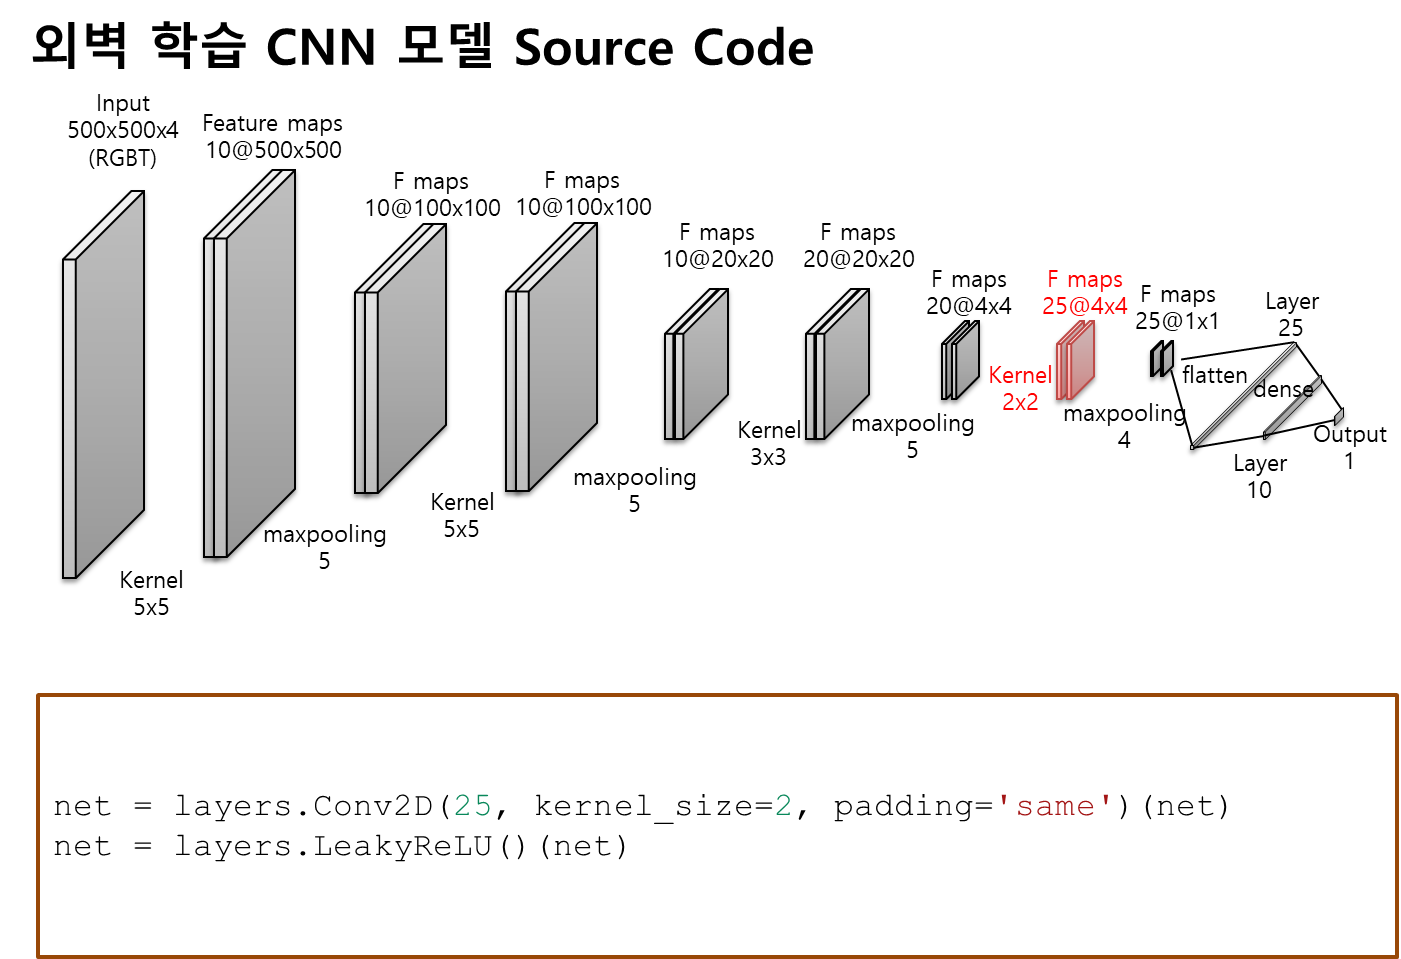

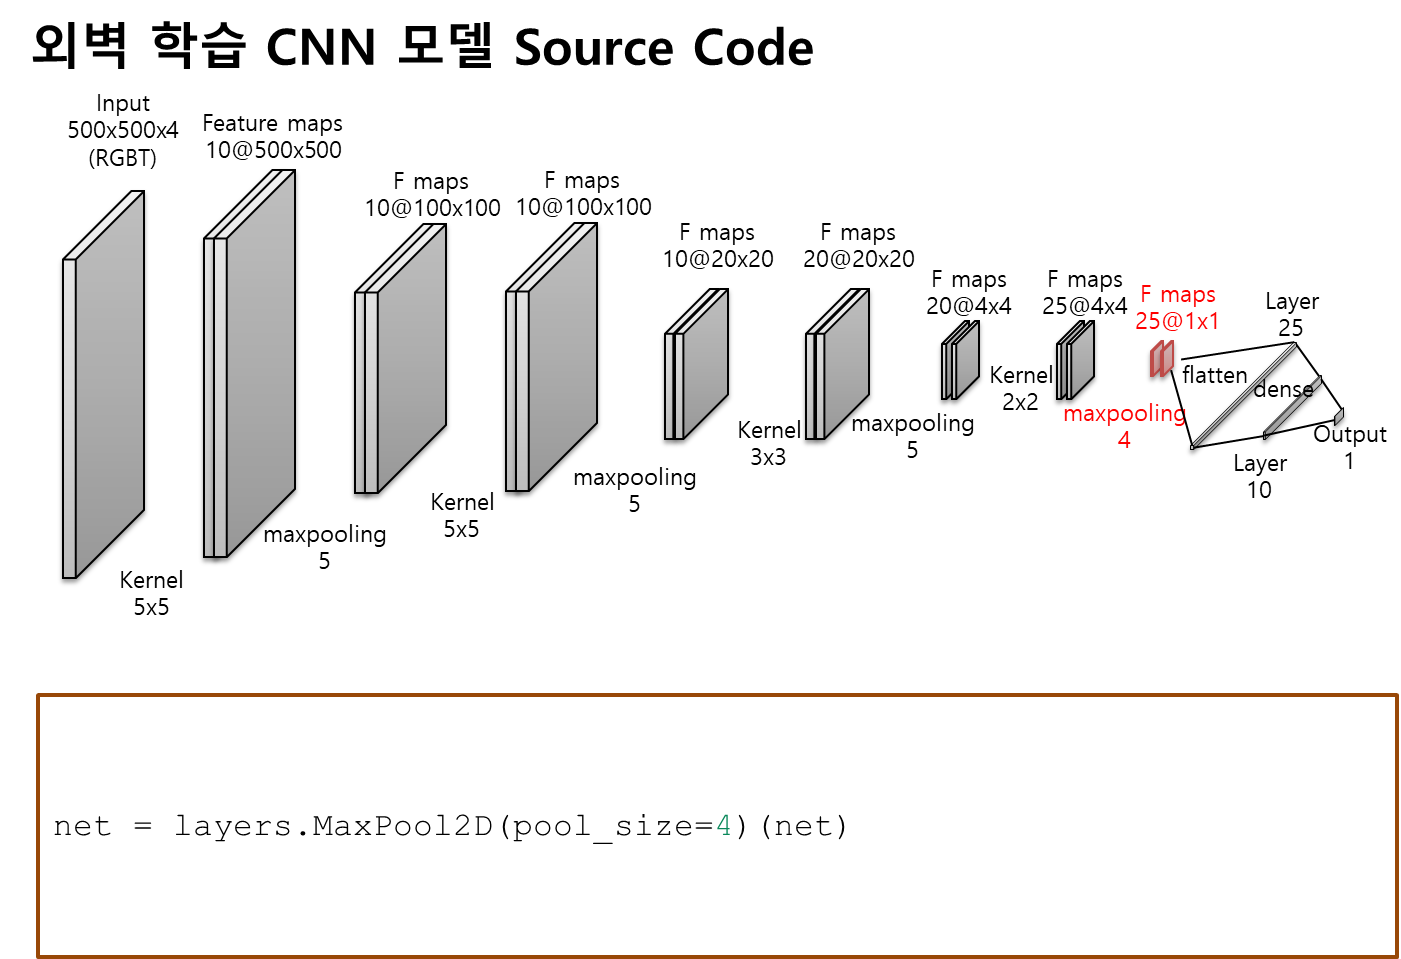

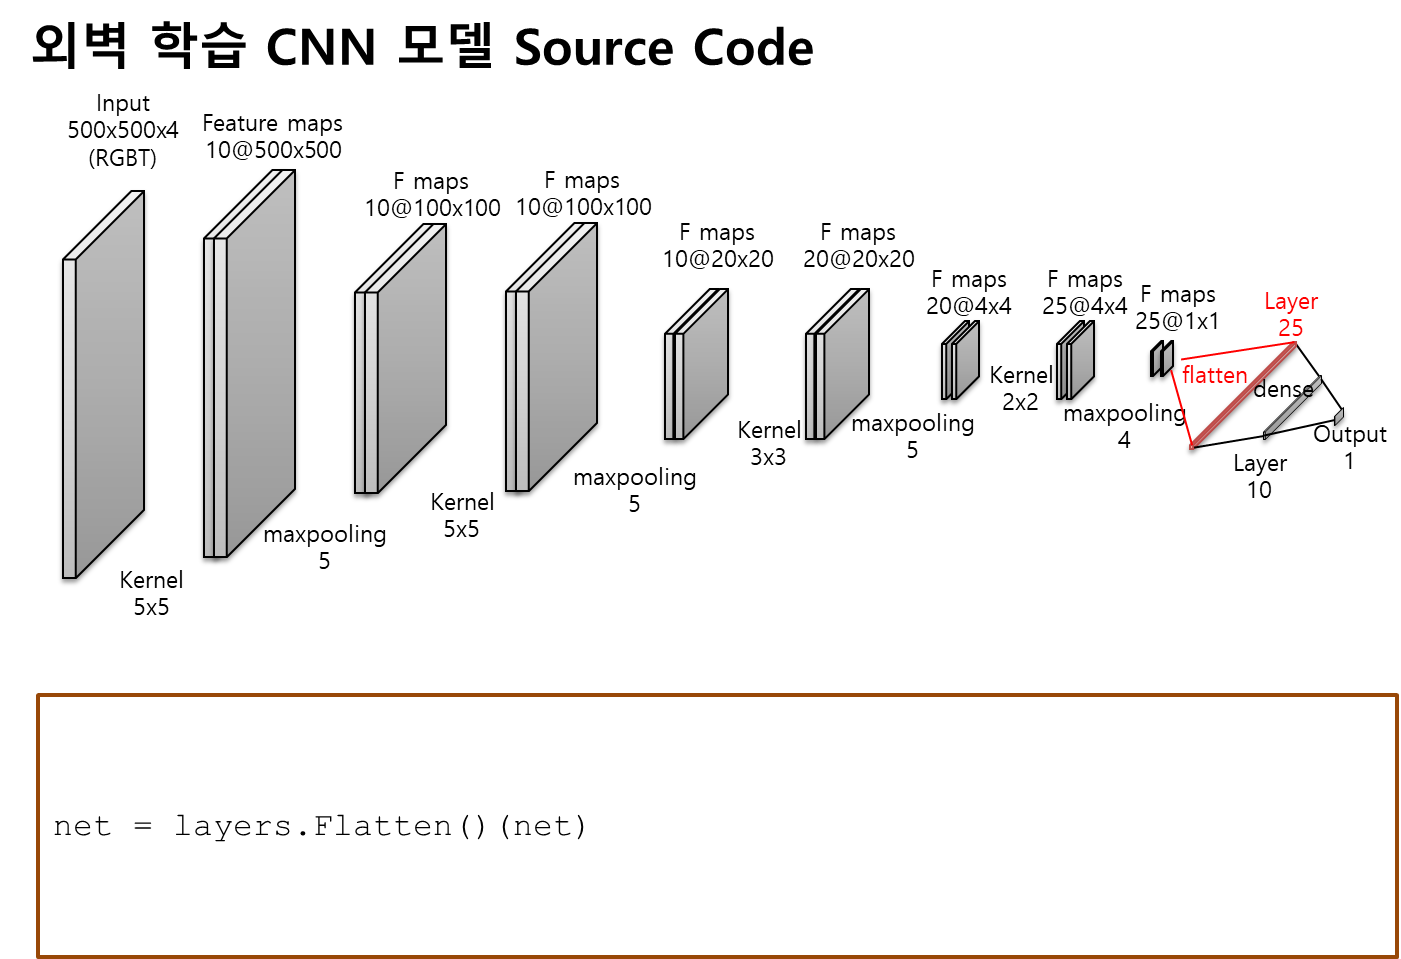

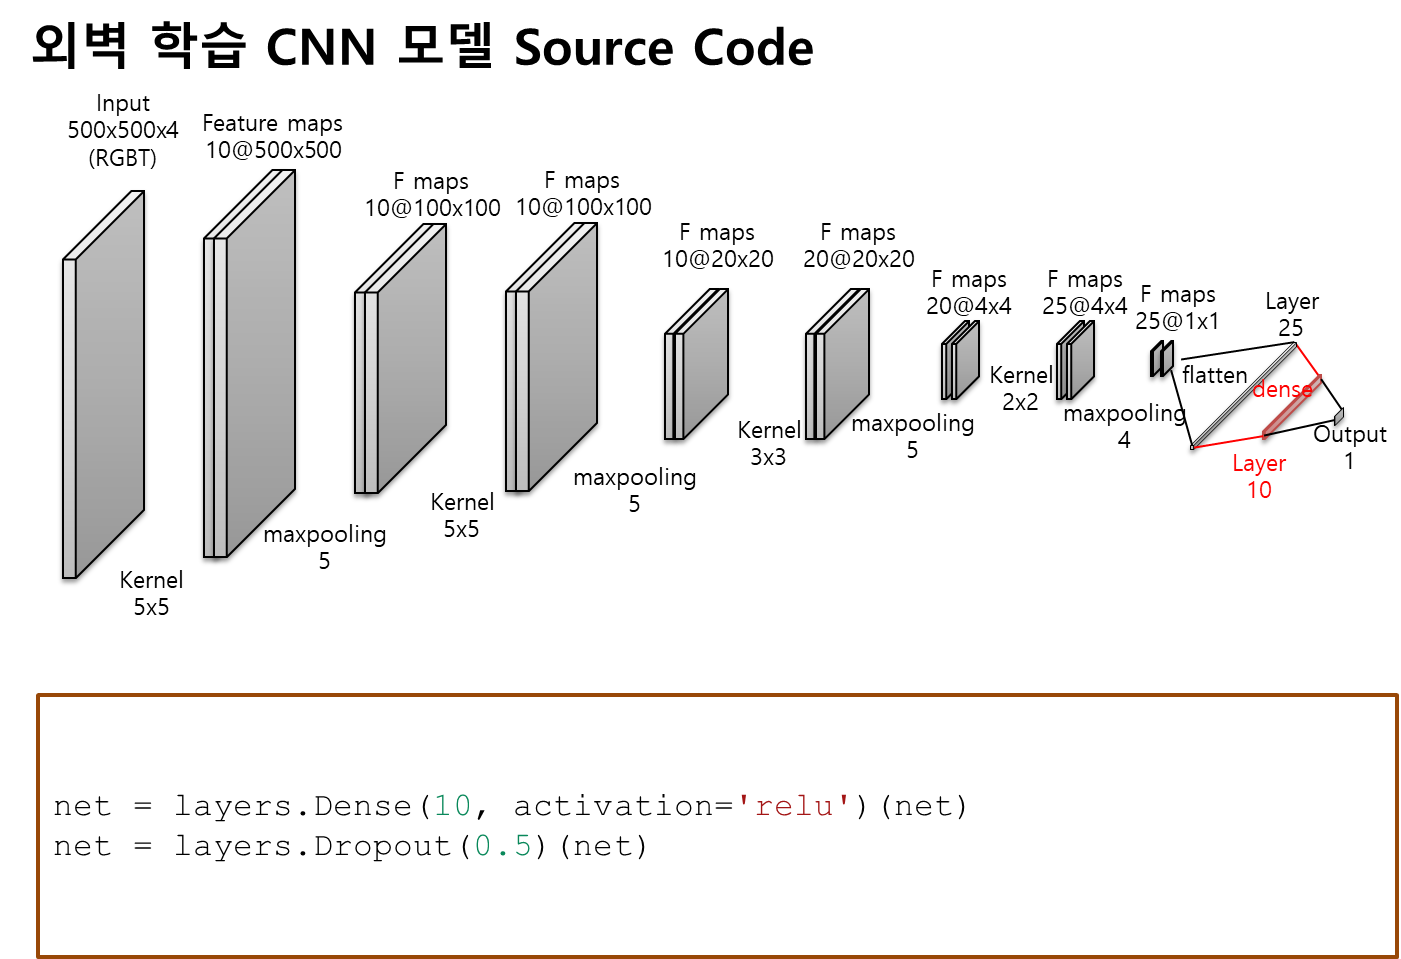

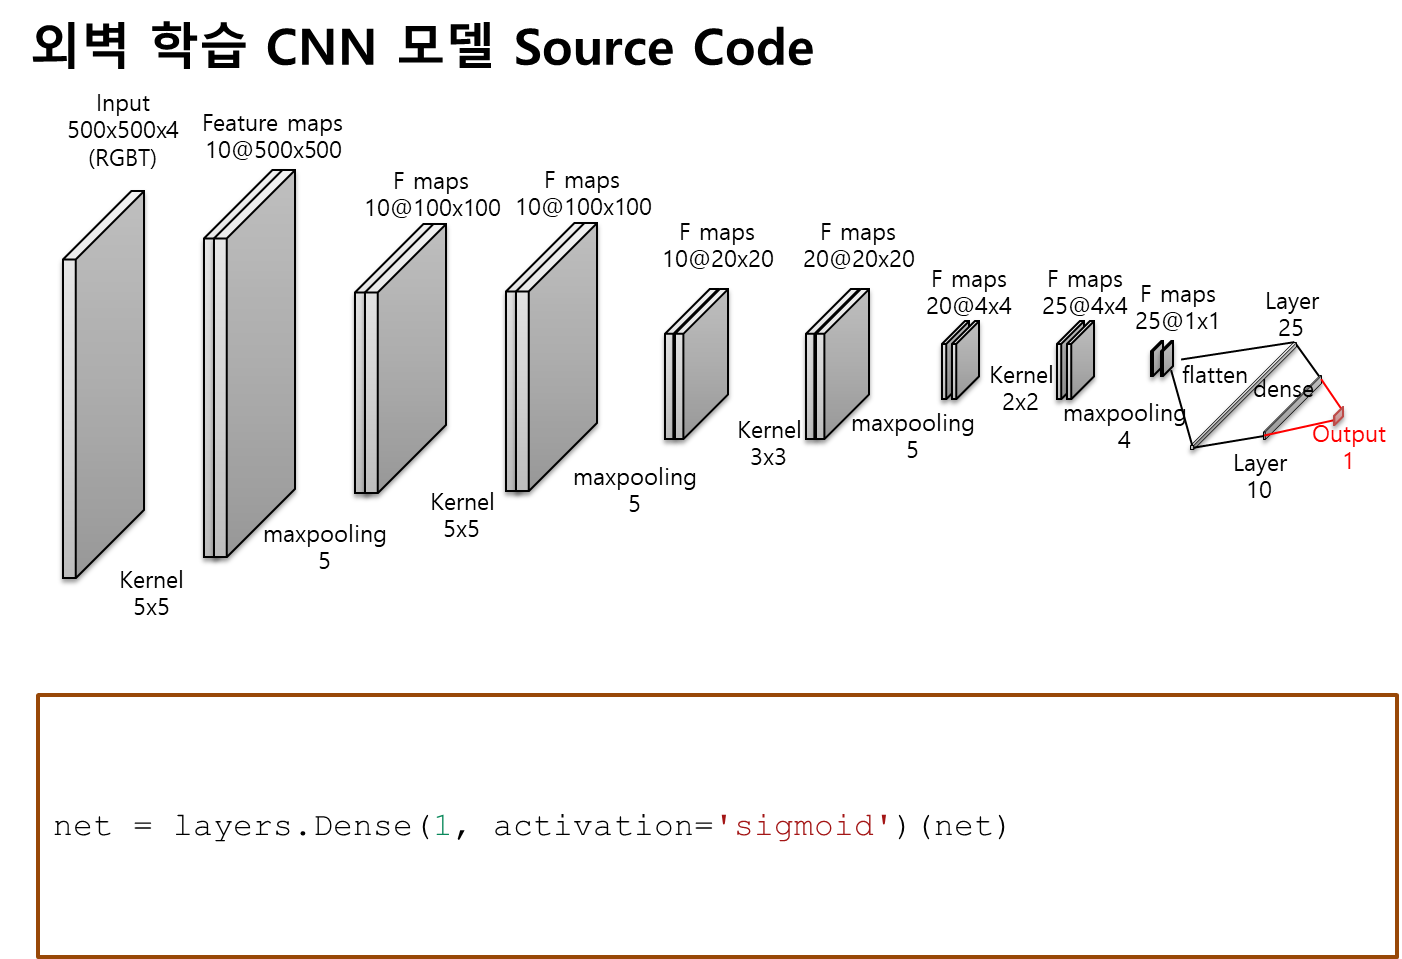

In [ ]:
#CNN 네트워크 만들기

inputs = layers.Input(shape=(500, 500, 4))


net = layers.Conv2D(10, kernel_size=5, padding='same')(inputs)
net = layers.LeakyReLU()(net)

net = layers.MaxPool2D(pool_size=5)(net)

net = layers.Conv2D(10, kernel_size=5, padding='same')(net)
net = layers.LeakyReLU()(net)

net = layers.MaxPool2D(pool_size=5)(net)

net = layers.Conv2D(20, kernel_size=3, padding='same')(net)
net = layers.LeakyReLU()(net)

net = layers.MaxPool2D(pool_size=5)(net)

net = layers.Conv2D(25, kernel_size=2, padding='same')(net)
net = layers.LeakyReLU()(net)

net = layers.MaxPool2D(pool_size=4)(net)

net = layers.Flatten()(net)

net = layers.Dense(10, activation='relu')(net)
net = layers.Dropout(0.5)(net)

net = layers.Dense(1, activation='sigmoid')(net)


model = Model(inputs=inputs, outputs=net)
model.compile(
    loss='binary_crossentropy',  #mse, mean_absolute_error
    optimizer='adam',
    metrics=['acc']
)
model.summary()

In [ ]:
hist = model.fit(training_x, training_y, epochs=100)

In [ ]:

#학습에 사용된 데이터를 이용하여 예측한다
predict_y = model.predict(training_x, verbose=1)

#실제값과 예측값 shape를 동일하게 변경
training_y = training_y.reshape(100,1)
predict_y.shape

result_training = np.concatenate([training_y, predict_y], axis=1)

result_training = np.round(result_training, 3)
# result_training[np.where(result_training<0.5)] = 0
# result_training[np.where(result_training>=0.5)] = 1
print(result_training)

In [ ]:
# prompt: ipywidgets 으로 실제 y와 예측 y의 값과 차이를 표시하고 아래 이미지를 출력해줘

import ipywidgets as widgets
from IPython.display import display, clear_output

def show_comparison(index):
  clear_output(wait=True)
  actual_y = training_y[index][0]
  predicted_y = predict_y[index][0]
  difference = abs(actual_y - predicted_y)

  print(f"Actual Y: {actual_y}")
  print(f"Predicted Y: {predicted_y}")
  print(f"Difference: {difference}")
  # Assuming training_x contains your image data
  plt.imshow(training_x[index])
  plt.show()


# Create a dropdown widget for selecting the index
dropdown = widgets.Dropdown(
    options=list(range(len(training_y))),
    value=0,
    description='Index:'
)

# Observe the dropdown widget for changes and update the display
widgets.interactive(show_comparison, index=dropdown)


In [ ]:

#검증 데이터를 이용하여 예측한다
predict_y2 = model.predict(testing_x, verbose=1)

#실제값과 예측값 shape를 동일하게 변경
testing_y = testing_y.reshape(38,1)
predict_y2.shape

result_testing = np.concatenate([testing_y, predict_y2], axis=1)


result_testing = np.round(result_testing, 3)
# result_testing[np.where(result_testing<0.5)] = 0
# result_testing[np.where(result_testing>=0.5)] = 1
print(result_testing)

In [ ]:
# prompt: ipywidgets 으로 실제 y와 예측 y의 값과 차이를 표시하고 아래 이미지를 출력해줘

import ipywidgets as widgets
from IPython.display import display, clear_output

def show_comparison(index):
  clear_output(wait=True)
  actual_y = testing_y[index][0]
  predicted_y = predict_y2[index][0]
  difference = abs(actual_y - predicted_y)

  print(f"Actual Y: {actual_y}")
  print(f"Predicted Y: {predicted_y}")
  print(f"Difference: {difference}")
  # Assuming training_x contains your image data
  plt.imshow(testing_x[index])
  plt.show()


# Create a dropdown widget for selecting the index
dropdown = widgets.Dropdown(
    options=list(range(len(testing_y))),
    value=0,
    description='Index:'
)

# Observe the dropdown widget for changes and update the display
widgets.interactive(show_comparison, index=dropdown)


In [ ]:
#학습 내용 출력용 함수
def diplay_result_layer(layer=1, idx = 0, f_map=0) :
  global model, training_x, training_y, predict_y

  new_model = Model(model.input,model.layers[layer].output) #각 층별로 레이어를 자른다
  predict = new_model.predict(np.array([training_x[idx, :, :, :]])) #dataseq위치의 학습 데이터를 입력한다

  dpi = 80
  if f_map > predict.shape[3] : f_map =  predict.shape[3]
  img = predict[0, :, :, f_map]

  figsize = 500/float(dpi), 500/float(dpi)
  fig = plt.figure(figsize=figsize)
  plt.imshow(img, cmap='gray')
  plt.title(model.get_layer(index=layer))
  plt.show()
#위젯을 이용하여  검증 결과 출력하기
ipywidgets.interact(diplay_result_layer, layer=(1, len(model.layers)-6, 1), f_map=(0,20,1), idx=(0, testing_y.shape[0], 1) )

In [ ]:
#flatten layer 확인
new_model = Model(model.input,model.layers[15].output) #flatten 결과 비교


predict = new_model.predict(training_x)
result_flatten = np.concatenate((result_training, predict), axis=1)

result_flatten = pd.DataFrame(result_flatten)

result_flatten

In [ ]:
np_flatten = np.array(result_flatten.values)
np_flatten.shape

In [ ]:
#flatten 값 클러스터링
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(np_flatten[:, 1:])
result_kmean = np.array(kmeans.labels_)
result_kmean

In [ ]:
#클러스터링 별로 출력해 보기

view_cluster = 1

f_cls = np.where(result_kmean == view_cluster)[0]


fig = plt.figure(figsize=(15,10))

for idx in range(len(f_cls)) :
  img = training_x[f_cls[idx],:,:,:] * 255
  img = img.astype('int')
  ax = fig.add_subplot(int((len(f_cls)) / 5+1), 5, idx+1)
  ax.imshow(img)
  ax.axis('off')

plt.show()
